<h1 style='font-size:40px'> Training Models</h1>

<h2 style='font-size:30px;'> Ajuste de modelos</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Neste capítulo, aprenderemos a ajustar os parâmetros de modelos, a começar pela Regressão Linear.
        </li>
        <li> 
            Com relação a ela, podemos tuná-la com o uso de uma equação que, prontamente, retorna os parâmetros que minimizam a função de custo. Ou, somos capazes também de usar uma abordagem conhecida como Gradient Descent, que iterativamente, modifica esses argumentos até que a função-custo seja a menor possível.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> Linear Regression</h2>
<center>
    <h1> Forma Vetorizada</h1>
    <img src='linreg2.png'>
</center>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Lembrando que uma das métricas mais utilizadas é a soma dos erros elevados ao quadrado do modelo (MSE).
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula Vetorizada do MSE</h1>
    <img src='mse.png'>
</center>

<h2 style='font-size:30px'> The Normal Equation</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Normal Equation é aquela responsável por definir os coeficientes da Regressão Linear.
        </li>
    </ul>
</div>
<center> 
    <h1> Fórmula da Normal Equation</h1>
    <img src='normalequation.png'>
</center>

<h2 style='font-size:30px'> Gradient Descent</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Como dito no início, o Gradient Descent, ajusta, iterativamente, os coeficientes da regressão até que a função de custo (por exemplo, o MSE) chegue a um valor mínimo.
        </li>
        <li>
            Os coeficientes recebem valores aleatórios de início, e eles são melhorados de acordo com uma learning rate definida. No entanto, dar um valor muito alto a ela pode fazer o modelo adquirir coeficientes inadequados.
        </li>
        <li> 
            Ademais, o autor recomenda que nós coloquemos todas as features dentro de uma mesma escala. Essa prática faz com que menos iterações sejam necessárias para que o valor mínimo da função-custo seja alcançado.
        </li>
    </ul>
</div>
<center> 
    <h1> O impacto de diferentes Learning Rates em uma Regressão</h1>
    <img src='learning_rate1.png'>
</center>

<h3 style='font-size:30px;font-style:italic'> Batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Bastante eficiente em treinamentos de datasets com muitas features. No entanto, perde eficiência conforme o número de instâncias aumenta!
        </li>
        <li> 
            Sua learning rate adequada pode ser descoberta com o GridSearch. 
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Stochastic Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Treinamento mais veloz em datasets grandes, mas peca em encontrar o valor-ótimo dos coeficientes.
        </li>
        <li> 
            Uma maneira que minimiza esse problema é o ajuste da learning rate periodicamente durante as iterações.
        </li>
    </ul>
</div>

In [49]:
# Fazendo uma regressão com o SGDRegressor.
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
dataset = make_regression(n_samples=100, n_features=1, random_state=42)
X = dataset[0]
y = dataset[1]

# O regressor fará 1000 (max_iter) iterações para descobrir os coeficientes adequados.
# A learning rate inicial (eta0) é 1%.
# A função de custo deve ter uma perda de menor do que 1e-3 (tol) por 5 iterações (n_iter_no_change) para que o processo de treinamento
# termine antes.
sgd_reg=SGDRegressor(max_iter=1000, n_iter_no_change=5,tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

# Inclinação da curva e ponto de interceptação.
print(sgd_reg.coef_, sgd_reg.intercept_)

[41.74109964] [-3.33178376e-07]


<h3 style='font-size:30px;font-style:italic'> Mini-batch Gradient Descent</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Este algoritmo de treinamento tem uma estratégia considerada como um meio-termo em comparação com o Batch Gradient Descent e o Stochastic Gradient Descent.
        </li>
    </ul>
</div>

<center> 
    <h1> Tabela-resumo dos algoritmos de regressão</h1>
    <img src='gradient_table.png'>
</center>

<h2 style='font-size:30px'> Polynomial Regression</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Na maior parte das vezes, uma simples reta não poderá nos fornecer uma boa previsão. Por exemplo, digamos que tivéssemos que fazer uma regressão com dados cuja distribuição espacial se aproxima com o de uma função quadrática.
        </li>
    </ul>
</div>

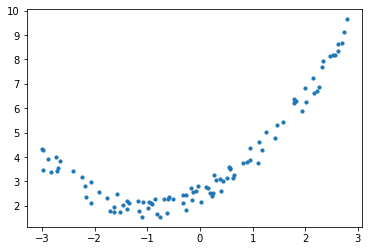

In [60]:
samples = 100
X = 6*np.random.rand(samples, 1)-3

# Os valores-alvo serão a aplicação de 'X' como argumento de uma função quadrática.
y = 0.5 * (X**2) + X + 2 + np.random.rand(samples,1)

# Como uma linha reta pode nos fornecer um baixo RMSE com esses dados?
plt.scatter(X,y, s=10)

<div> 
    <ul style='font-size:20px'> 
        <li>
            Neste contexto, o scikit-learn tem a classe PolynomialFeatures, que retorna cada os dados originais mais cada um dos resultados de sua soma elevada a n (sem os coeficientes).
        </li>
        <li> 
            Por exemplo, com um dataset de duas features (a,b), ao usarmos PolynomialFeatures com degree=2, o valor retornado será, além de a e b, $a^2, ab, b^2 $
        </li>
        <li> 
            O array final retornado, em função de degree (d)  $ \frac{(n+d)!}{d!n!}!$
        </li>
    </ul>
</div>

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Esta versão extendida de 'X' contém agora 2 features: a original e o seu quadrado.
X_poly[0]

array([-1.57494397,  2.4804485 ])

In [69]:
# Aplicando um modelo de Regressão Linear.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Pronto! Temos todos os coeficientes de uma função quadrática (axˆ2 + bx +c).
lin_reg.coef_, lin_reg.intercept_

(array([[1.00515912, 0.50602725]]), array([2.51520238]))

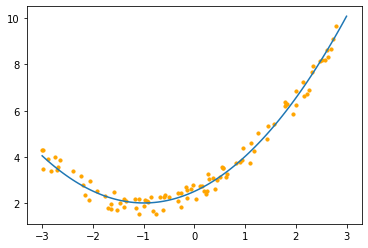

In [87]:
# A hipérbole gerada se adequa muito bem 
xs = np.linspace(-3,3,101)
xs_poly = poly_features.transform(xs.reshape(-1,1))
ys = lin_reg.predict(xs_poly)
plt.plot(xs, ys)
plt.scatter(X,y, color='orange', s=10)

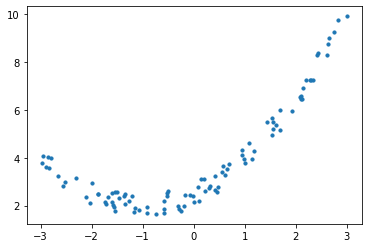

In [59]:
# Neste contexto, o scikit-learn tem a classe PolynomialFeatures, que retorna cada os dados originais mais cada um de seus resultados
# elevados a n.

# Por exe


<p style='color:red'> Fazer o SGDRegressor</p>

In [50]:
! mv  /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-05-14\ at\ 16.24.04.png ./gradient_table.png